# NFL Arrests Analysis

![alt text](arrest_nfl_image.jpg )

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load NFL stadium arrests data & review data set information

In [168]:
df = pd.read_csv('data.csv')
df.head(10)

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n
5,2011,14,Sunday,2:05:00 PM,Arizona,San Francisco,21,19,NaN,4.0,y
6,2011,15,Sunday,2:15:00 PM,Arizona,Cleveland,20,17,OT,1.0,n
7,2011,17,Sunday,2:15:00 PM,Arizona,Seattle,23,20,OT,4.0,y
8,2012,1,Sunday,1:25:00 PM,Arizona,Seattle,20,16,NaN,0.0,y
9,2012,3,Sunday,1:05:00 PM,Arizona,Philadelphia,27,6,NaN,12.0,n


In [169]:
df.describe()

,season,week_num,home_score,away_score,arrests
count,1006.000000,1006.000000,1006.000000,1006.000000,966.000000
mean,2013.000000,9.116302,23.934394,21.115308,6.566253
std,1.406453,5.008986,10.442626,9.734006,9.512101
min,2011.000000,1.000000,0.000000,0.000000,0.000000
25%,2012.000000,5.000000,17.000000,14.000000,1.000000
50%,2013.000000,9.000000,23.000000,20.000000,3.000000
75%,2014.000000,14.000000,30.000000,27.000000,8.000000
max,2015.000000,17.000000,59.000000,56.000000,69.000000


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 11 columns):
season            1006 non-null int64
week_num          1006 non-null int64
day_of_week       1006 non-null object
gametime_local    1006 non-null object
home_team         1006 non-null object
away_team         1006 non-null object
home_score        1006 non-null int64
away_score        1006 non-null int64
OT_flag           59 non-null object
arrests           966 non-null float64
division_game     1006 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 86.5+ KB


## Which home team has the most fan arrests?

In [171]:
# add in home team win flag
df['home_team_win'] = df['home_score'] > df['away_score']
df.head(3)

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game,home_team_win
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n,True
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n,False
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n,False


In [172]:
team_arrests = df[['home_team', 'home_team_win', 'arrests']].groupby(['home_team', 'home_team_win']).sum()
team_arrests.head(5)

arrests
home_team home_team_win         
Arizona   False             55.0
          True             111.0
Baltimore False             18.0
          True              28.0
Carolina  False             18.0

## Home team loses & number of arrests

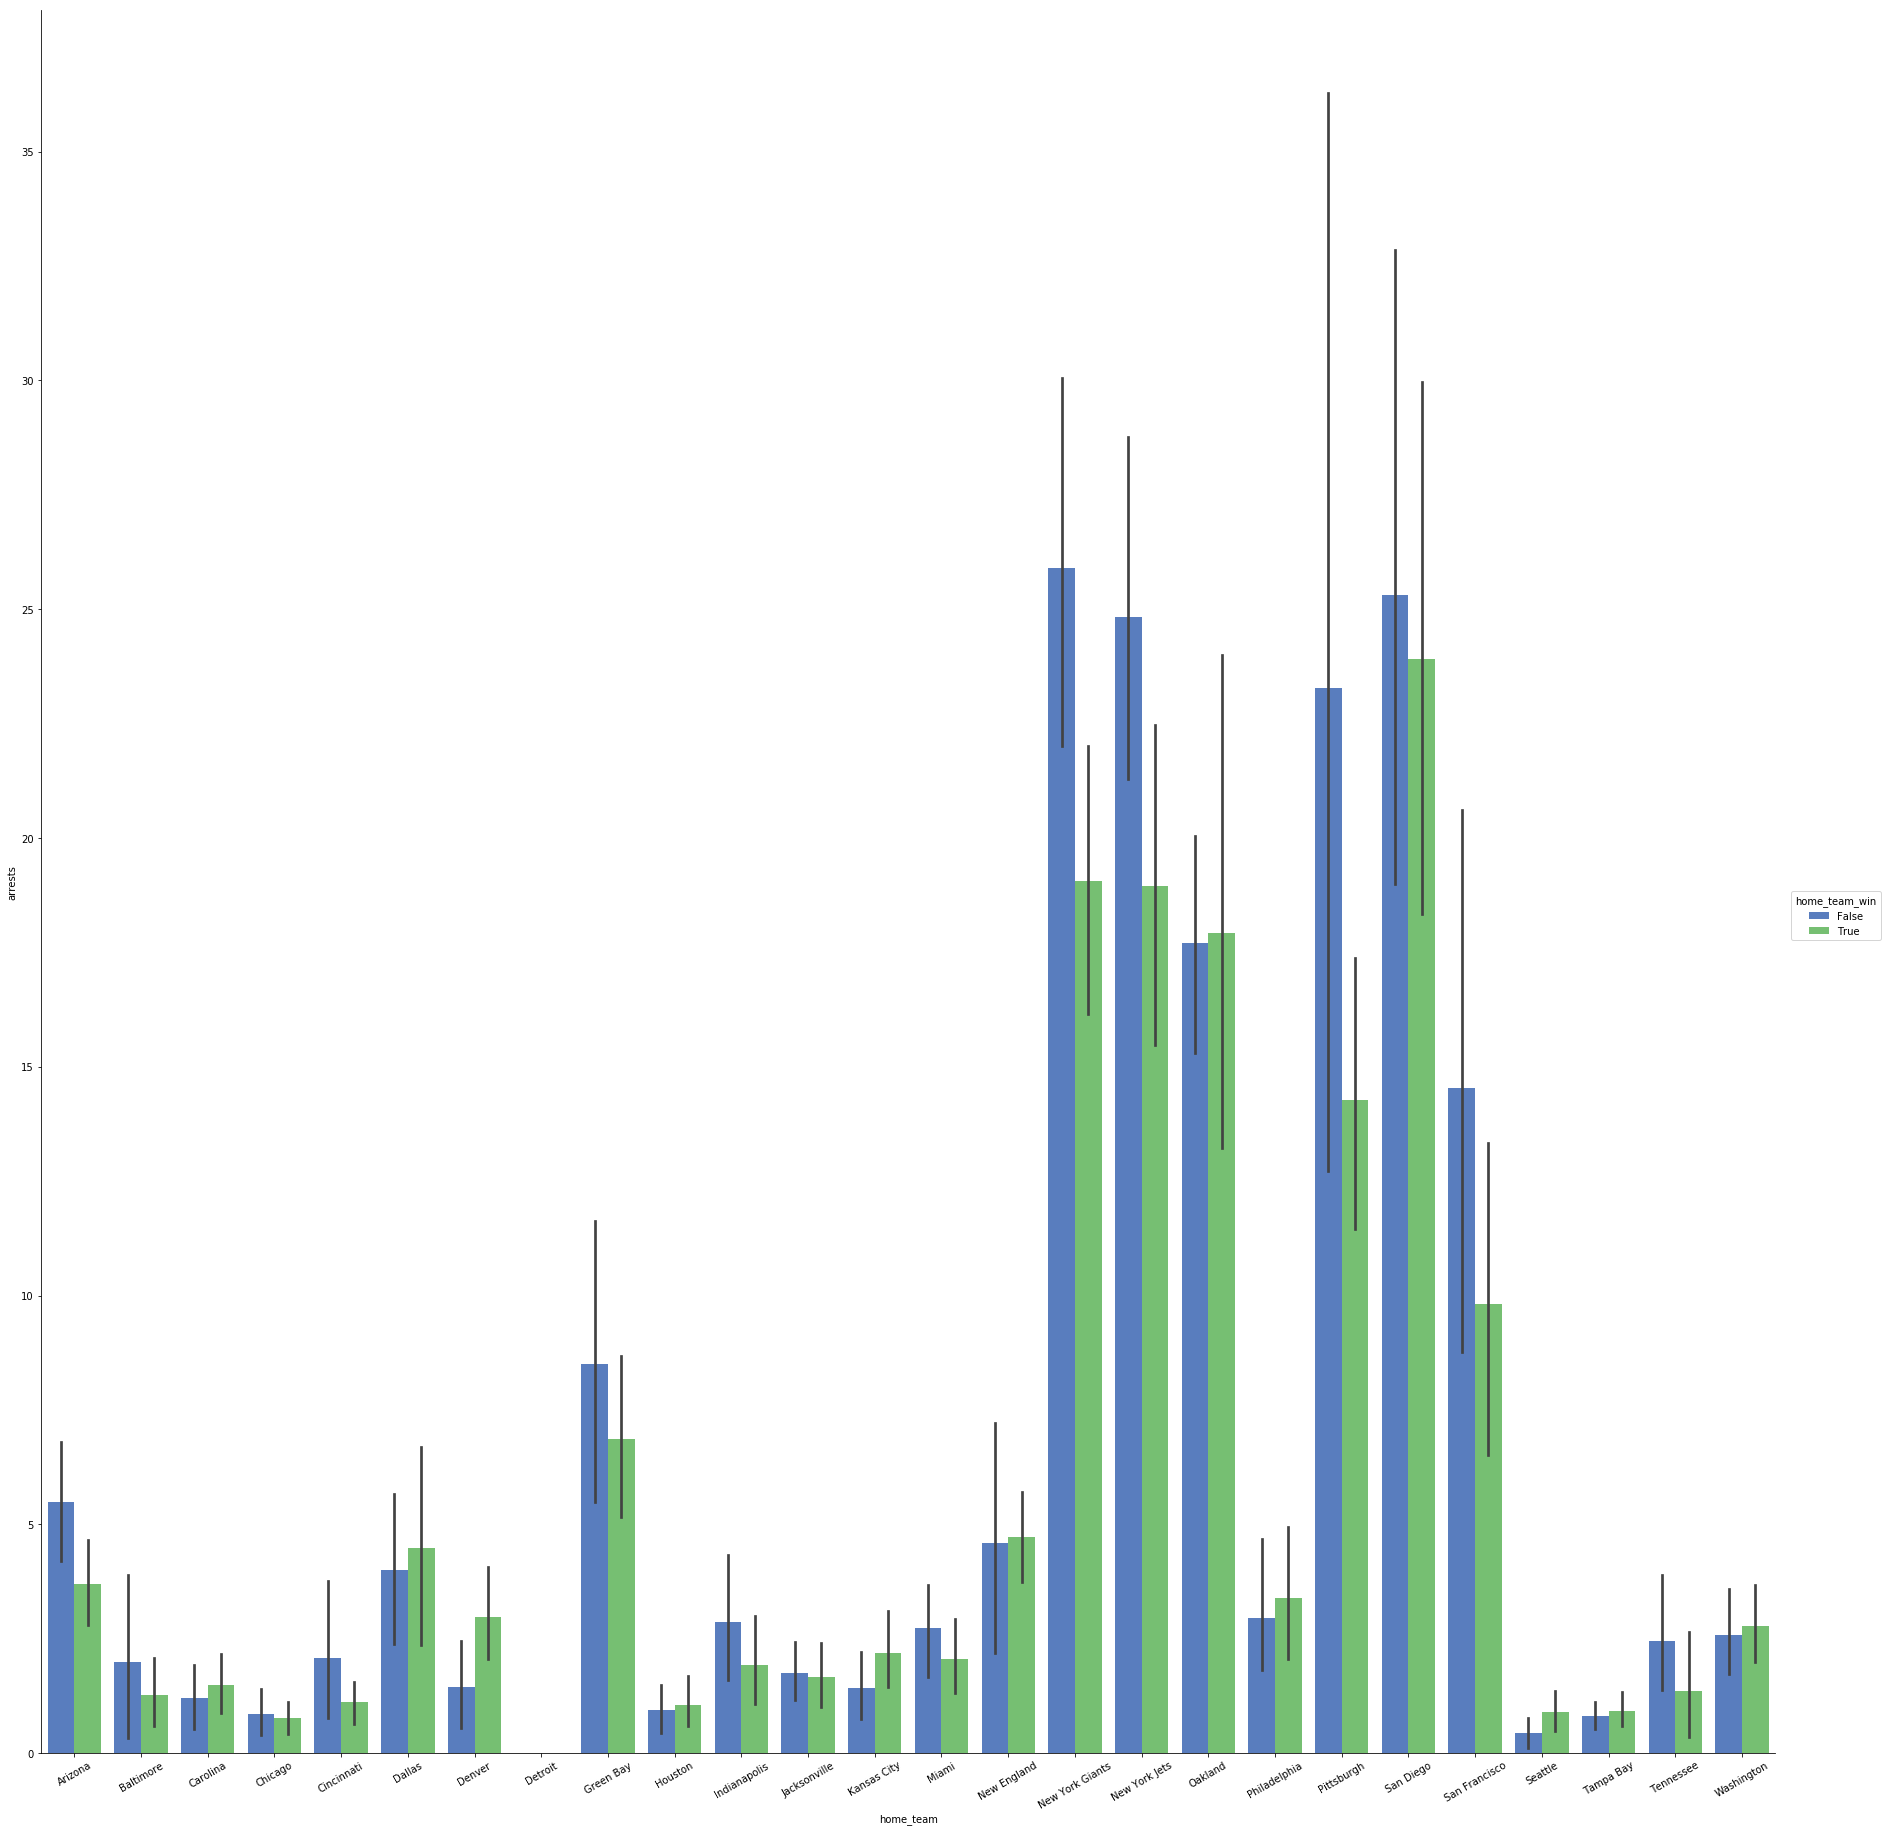

In [173]:
sns.factorplot(x="home_team", y="arrests", hue="home_team_win", data=df,
                   size=25, kind="bar", palette="muted", legend_out=True).set_xticklabels(rotation=30)

## Fan arrests when home team wins or loses

In [174]:
df[['home_team_win','arrests']].groupby(['home_team_win']).sum()

,arrests
home_team_win,
False,2994.0
True,3349.0


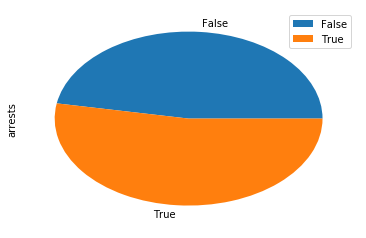

In [175]:
df[['home_team_win','arrests']].groupby(['home_team_win']).sum().plot(kind='pie', y='arrests')

Text(0.5,1,'Arrests Percentages if home team wins/loses')

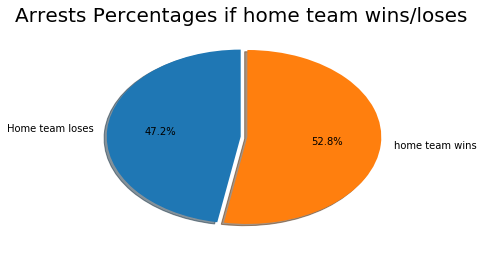

In [176]:
sizes = df[['home_team_win','arrests']].groupby(['home_team_win']).sum()
explode = (0, 0.05)
labels = ('Home team loses', 'home team wins')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Arrests Percentages if home team wins/loses', size=20)

## Obtain additional data on NFL stadiums for further analysis

In [177]:
stadium_list = pd.read_html('http://www.stadiumsofprofootball.com/comparisons/')
stadium_df = stadium_list[0]
stadium_df

,Name,Team(s),Capacity,Opened,Turf,Cost
0,Lambeau Field,Green Bay Packers,80735,9/29/1957,Grass,"$960,000"
1,Oakland Coliseum,Oakland Raiders,53250,9/18/1966,Grass,$25.5 Million
2,Qualcomm Stadium,San Diego Chargers,71500,8/20/1967,Grass,$27 Million
3,Arrowhead Stadium,Kansas City Chiefs,76416,8/12/1972,Grass,$43 Million
4,New Era Field,Buffalo Bills,73967,8/17/1973,FieldTurf,$22 Million
5,Superdome,New Orleans Saints,76468,9/28/1975,FieldTurf,$134 Million
6,Hard Rock Stadium,Miami Dolphins,65326,8/16/1987,Grass,$115 Million
7,Georgia Dome,Atlanta Falcons,71250,9/6/1992,FieldTurf,$214 Million
8,EverBank Field,Jacksonville Jaguars,67264,8/18/1995,Grass,$134 Million
9,Los Angeles Coliseum,Los Angeles Rams,93605,9/18/2016,Grass,"$954,872"


## Get NFL player arrest data to see if the players are as bad as the fans

In [178]:
# Not going to use this data source but is excellent site for NFL arrest data & vizulizing data
#team_data = pd.read_html('https://en.wikipedia.org/wiki/National_Football_League')
# http://nflarrest.com

In [179]:
player_data = pd.read_html('https://www.usatoday.com/sports/nfl/arrests/')[0]

In [180]:
raw_cols = player_data.columns.values
fixed_cols = [i.lower() for i in raw_cols]
fixed_cols_dict = dict(zip(raw_cols, fixed_cols))
player_data.rename(columns=fixed_cols_dict, inplace=True)
player_data.columns.values
player_data['year'] = player_data['date'].str.slice(0,4)
player_data.head()


,date,team,name,pos,case,category,description,outcome,year
0,2018-02-26,NYJ,Dylan Donahue,LB,Arrested,DUI,"Accused of drunken driving, driving wrong way ...",Resolution undetermined.,2018
1,2018-02-11,SF,Reuben Foster,LB,Arrested,Domestic violence,"Suspected of domestic violence, possession of ...",Resolution undetermined.,2018
2,2018-01-25,BAL,Marlon Humphrey,CB,Arrested,Robbery,Accused of stealing $15 phone charger and refu...,Resolution undetermined.,2018
3,2018-01-19,NYJ,Robby Anderson,WR,Arrested,Eluding police,"Accused of reckless driving in South Florida, ...",Resolution undetermined.,2018
4,2018-01-14,DEN,Carlos Henderson,WR,Arrested,Drugs,He was the passenger in a car pulled over for ...,Resolution undetermined.,2018


In [188]:
player_data['counter'] = 1
player_data[['team', 'year', 'counter']].groupby(['team', 'year']).sum()
#cast dates to years - just substr date [0:4]?
#group by year, team & # of arrests


counter
team year         
ARI  2000        1
     2001        3
     2002        2
     2003        1
     2004        2
     2005        2
     2008        1
     2010        1
     2013        3
     2014        2
     2015        2
     2016        1
     2017        1
ATL  2003        1
     2004        1
     2005        1
     2007        4
     2008        3
     2009        3
     2011        1
     2012        2
     2013        2
     2014        1
     2015        1
BAL  2000        2
     2001        3
     2003        2
     2004        2
     2005        1
     2006        1
...            ...
TB   2013        4
     2014        2
     2016        1
     2018        1
TEN  2000        1
     2003        1
     2004        1
     2005        5
     2006        8
     2007        1
     2008        3
     2009        1
     2010        5
     2011        4
     2012        1
     2013        1
     2014        2
     2015        2
WAS  2000        2
     2003        2
     2004        2
     2005        1
     2006        1
     2007        1
     2009        1
     2010        6
     2011        2
     2012        1
     2014        2
     2017        1

[429 rows x 1 columns]

TODO:
    summerize fan data by year, home team, arrest #'s
    get player data for same & merge, compare arrests between teams & players 
    